# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth (23.4 Deg. perpendicular to the ecliptic).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 60 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import csv
import json
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [3]:
df = pd.DataFrame({
    "City": cities
})

df.to_csv(output_data_file)

data = pd.read_csv("../output_data/cities.csv")

data["City"] = cities
data["Cloudiness"] = ""
data["Country"] = ""
data["date"] = ""
data["humidity"] = ""
data["lat"] = ""
data["lon"] = ""
data["max temp"] = ""
data["wind speed"] = ""


column_names = ["City", "Country", "Date", "Cloudiness", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

data = pd.DataFrame(data, columns=column_names)
data.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,,NaN,,NaN,NaN,NaN,NaN,NaN
1,chuy,,NaN,,NaN,NaN,NaN,NaN,NaN
2,mataura,,NaN,,NaN,NaN,NaN,NaN,NaN
3,belaya gora,,NaN,,NaN,NaN,NaN,NaN,NaN
4,alenquer,,NaN,,NaN,NaN,NaN,NaN,NaN


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    "key": api_key,
    "units": units,
}

for index, row in data.iterrows():
    
    time.sleep(1)
    
    city = row['City']
    
    query_url = url + "appid=" + api_key + "&" + units + "&q=" + city
    
    print(f"Retrieving Results for Index {index}: {city}.")
    
    response = requests.get(query_url).json()
    
    try:
        data.loc[index, 'Country'] = response["sys"]["country"]
        data.loc[index, "Date"] = response["dt"]
        data.loc[index, 'Cloudiness'] = str(response["clouds"]["all"])
        data.loc[index, "Humidity"] = response["main"]["humidity"]


        data.loc[index, 'Lat'] = response["coord"]["lat"]
        data.loc[index, 'Lng'] = response["coord"]["lon"]
        data.loc[index, "Max Temp"] = response["main"]["temp_max"]
        data.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Index 0: albany.
------------
Retrieving Results for Index 1: chuy.
------------
Retrieving Results for Index 2: mataura.
------------
Retrieving Results for Index 3: belaya gora.
------------
Retrieving Results for Index 4: alenquer.
------------
Retrieving Results for Index 5: punta arenas.
------------
Retrieving Results for Index 6: matagami.
------------
Retrieving Results for Index 7: umzimvubu.
Missing field/result... skipping.
------------
Retrieving Results for Index 8: vanimo.
------------
Retrieving Results for Index 9: jamestown.
------------
Retrieving Results for Index 10: iralaya.
------------
Retrieving Results for Index 11: makakilo city.
------------
Retrieving Results for Index 12: hattiesburg.
------------
Retrieving Results for Index 13: coihaique.
------------
Retrieving Results for Index 14: volkhov.
------------
Retrieving Results for Index 15: gat.
------------
Retrieving Results for Index 16: barentsburg.
Missing field/result... skipping

------------
Retrieving Results for Index 137: khatanga.
------------
Retrieving Results for Index 138: whitehorse.
------------
Retrieving Results for Index 139: samusu.
Missing field/result... skipping.
------------
Retrieving Results for Index 140: linjiang.
------------
Retrieving Results for Index 141: mahebourg.
------------
Retrieving Results for Index 142: juegang.
------------
Retrieving Results for Index 143: noumea.
------------
Retrieving Results for Index 144: bathsheba.
------------
Retrieving Results for Index 145: tibiri.
------------
Retrieving Results for Index 146: khaniotis.
------------
Retrieving Results for Index 147: severo-kurilsk.
------------
Retrieving Results for Index 148: pevek.
------------
Retrieving Results for Index 149: kapaa.
------------
Retrieving Results for Index 150: kailua.
------------
Retrieving Results for Index 151: dhidhdhoo.
------------
Retrieving Results for Index 152: alice springs.
------------
Retrieving Results for Index 153: boa v

Retrieving Results for Index 272: barrow.
------------
Retrieving Results for Index 273: cherskiy.
------------
Retrieving Results for Index 274: namibe.
------------
Retrieving Results for Index 275: salta.
------------
Retrieving Results for Index 276: katwijk.
------------
Retrieving Results for Index 277: kutum.
------------
Retrieving Results for Index 278: posse.
------------
Retrieving Results for Index 279: tsihombe.
Missing field/result... skipping.
------------
Retrieving Results for Index 280: bilibino.
------------
Retrieving Results for Index 281: asau.
Missing field/result... skipping.
------------
Retrieving Results for Index 282: fukue.
------------
Retrieving Results for Index 283: angoche.
------------
Retrieving Results for Index 284: dahod.
------------
Retrieving Results for Index 285: bargal.
Missing field/result... skipping.
------------
Retrieving Results for Index 286: bethel.
------------
Retrieving Results for Index 287: nanortalik.
------------
Retrieving Re

Retrieving Results for Index 405: barguzin.
------------
Retrieving Results for Index 406: poum.
------------
Retrieving Results for Index 407: constitucion.
------------
Retrieving Results for Index 408: mackenzie.
------------
Retrieving Results for Index 409: tuggurt.
Missing field/result... skipping.
------------
Retrieving Results for Index 410: klaksvik.
------------
Retrieving Results for Index 411: tuy hoa.
------------
Retrieving Results for Index 412: homer.
------------
Retrieving Results for Index 413: burnie.
------------
Retrieving Results for Index 414: fevralsk.
Missing field/result... skipping.
------------
Retrieving Results for Index 415: lagunillas.
------------
Retrieving Results for Index 416: kropotkin.
------------
Retrieving Results for Index 417: garoua.
------------
Retrieving Results for Index 418: tessalit.
------------
Retrieving Results for Index 419: lata.
------------
Retrieving Results for Index 420: sandorfalva.
------------
Retrieving Results for Ind

------------
Retrieving Results for Index 542: high level.
------------
Retrieving Results for Index 543: atar.
------------
Retrieving Results for Index 544: uige.
------------
Retrieving Results for Index 545: aykhal.
------------
Retrieving Results for Index 546: xining.
------------
Retrieving Results for Index 547: burica.
Missing field/result... skipping.
------------
Retrieving Results for Index 548: svetlaya.
------------
Retrieving Results for Index 549: kirkuk.
------------
Retrieving Results for Index 550: falealupo.
Missing field/result... skipping.
------------
Retrieving Results for Index 551: tecoanapa.
------------
Retrieving Results for Index 552: sao joao da barra.
------------
Retrieving Results for Index 553: nemuro.
------------
Retrieving Results for Index 554: verkhoshizhemye.
------------
Retrieving Results for Index 555: vitim.
------------
Retrieving Results for Index 556: alofi.
------------
Retrieving Results for Index 557: kharitonovo.
------------
Retrievi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
data = data.dropna(axis = 0, how ='any') 
data.to_csv(output_data_file)
data.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,US,1.555618e+09,90,66.0,42.65,-73.75,285.93,6.70
1,chuy,UY,1.555619e+09,83,63.0,-33.69,-53.46,295.30,2.29
2,mataura,NZ,1.555619e+09,0,70.0,-46.19,168.86,282.60,2.62
3,belaya gora,RU,1.555619e+09,84,79.0,68.54,146.19,259.10,5.28
4,alenquer,BR,1.555618e+09,40,70.0,-1.95,-54.74,304.15,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

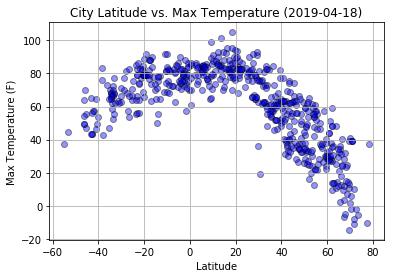

In [17]:
#Design the scatter plot
city_lat = data["Lat"]
max_temp = 1.8*(data["Max Temp"] - 273) + 32
today = date.today()

plt.scatter(city_lat, max_temp,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title(f"City Latitude vs. Max Temperature ({today})")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_max_temp_scatter_plot.png")
plt.show()


#### Latitude vs. Humidity Plot

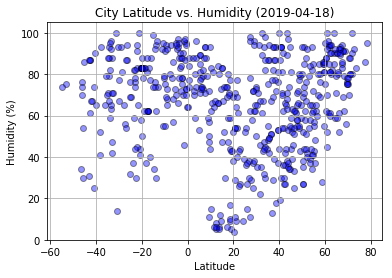

In [18]:
#Design the scatter plot
city_lat = data["Lat"]
humid_data = data["Humidity"]


plt.scatter(city_lat, humid_data,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title(f"City Latitude vs. Humidity ({today})")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_humid_scatter_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

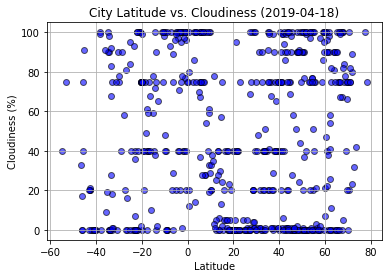

In [19]:
#Design the scatter plot
city_lat = data["Lat"]
cloud_data = data["Cloudiness"].astype('float')


plt.scatter(city_lat, cloud_data, marker="o", facecolors="blue", edgecolors="black", alpha=0.6)

#Create title and labels
plt.title(f"City Latitude vs. Cloudiness ({today})")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_cloud_scatter_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

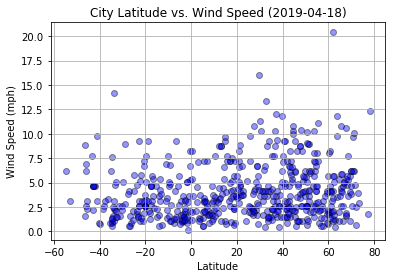

In [20]:
#Design the scatter plot
city_lat = data["Lat"]
wind_speed_data = data["Wind Speed"]


plt.scatter(city_lat, wind_speed_data,marker="o", facecolors="blue", edgecolors="black", alpha=0.42)

#Create title and labels
plt.title(f"City Latitude vs. Wind Speed ({today})")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#Save an image of the chart
plt.savefig("../Images/lat_wind_speed_scatter_plot.png")
plt.show()